In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(7.7,7.7)}) # graph size

In [2]:
with open("student_download.json", "r") as f:
    data_s_download = json.load(f)
    
df_download = pd.DataFrame(data_s_download['student_download']) 
df_download.replace('', np.nan, inplace=True)

print('shape - df_download', df_download.shape)
print(df_download.info())
df_download.head()

('shape - df_download', (50000, 15))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
Active               50000 non-null object
Client               50000 non-null object
DownloadClient       23608 non-null object
DownloadDate         50000 non-null object
DownloadFileID       50000 non-null object
DownloadID           50000 non-null object
Email                50000 non-null object
FirstAccessedPage    32768 non-null object
Fullname             50000 non-null object
Gender               50000 non-null object
Id                   50000 non-null object
IsMobileRegister     50000 non-null object
LastLoginDate        50000 non-null object
RegisteredDate       50000 non-null object
UploadCount          50000 non-null object
dtypes: object(15)
memory usage: 5.7+ MB
None


,Active,Client,DownloadClient,DownloadDate,DownloadFileID,DownloadID,Email,FirstAccessedPage,Fullname,Gender,Id,IsMobileRegister,LastLoginDate,RegisteredDate,UploadCount
0,true,Website,NaN,2015-12-07 19:12:13,1561467,47839069,carolinabrovani@gmail.com,https://www.passeidireto.com/arquivo/1561467/m...,carolinab,false,17769990,false,2015-12-07 19:10:41,2015-12-07 19:10:43,0
1,true,Website,NaN,2015-12-07 19:09:54,1776861,47838631,wesley10_henrique@hotmail.com,https://www.passeidireto.com/arquivo/1776861/t...,Wesley Ruiz,true,17769961,false,2015-12-07 19:08:39,2015-12-07 19:08:36,0
2,true,Website,NaN,2015-12-07 19:10:12,3616897,47838702,baluhh@hotmail.com,https://www.passeidireto.com/arquivo/3616897/l...,LucasBrandt,false,17769942,false,2015-12-07 19:07:41,2015-12-07 19:07:44,0
3,true,Website,NaN,2015-12-07 19:08:55,4180002,47838451,otavioluiz.2203@gmail.com,https://www.passeidireto.com/arquivo/4180002/c...,Luiz Shinkami,true,17769936,false,2015-12-07 19:07:24,2015-12-07 19:07:23,0
4,true,Website,NaN,2015-12-07 19:09:08,3046473,47838484,junior_jr17msn@hotmail.com,https://www.passeidireto.com/arquivo/3046473/q...,Jorgeluiz,false,17769935,false,2015-12-07 19:07:22,2015-12-07 19:07:21,0


In [3]:
for i in {'LastLoginDate', 'RegisteredDate'}:
    df_download[i] = pd.to_datetime(df_download[i])

In [4]:
df_download['tempo_user'] = df_download['LastLoginDate'] - df_download['RegisteredDate']

In [5]:
df_download['tempo_user'] = df_download['tempo_user'].dt.days
df_download['tempo_user'] = df_download['tempo_user'].astype(float)
df_download.tempo_user = df_download.tempo_user.replace(-1, 0)

In [6]:
df_download[['LastLoginDate', 'RegisteredDate', 'tempo_user']].head()

,LastLoginDate,RegisteredDate,tempo_user
0,2015-12-07 19:10:41,2015-12-07 19:10:43,0.0
1,2015-12-07 19:08:39,2015-12-07 19:08:36,0.0
2,2015-12-07 19:07:41,2015-12-07 19:07:44,0.0
3,2015-12-07 19:07:24,2015-12-07 19:07:23,0.0
4,2015-12-07 19:07:22,2015-12-07 19:07:21,0.0


# tempo de cadastro de usuários que fazem downloads

In [7]:
df = df_download.groupby('Id')['tempo_user'].max().reset_index()
df.head()

,Id,tempo_user
0,17702193,3.0
1,17702194,4.0
2,17702195,0.0
3,17702198,0.0
4,17702208,0.0


In [8]:
df.sort_values(by='tempo_user', ascending=False, inplace=True)
df.head()

,Id,tempo_user
1501,17709280,4.0
237,17703308,4.0
467,17704395,4.0
346,17703817,4.0
1615,17709838,4.0


In [9]:
print('media', df['tempo_user'].mean())
print('median', df['tempo_user'].median())

('media', 0.09270752521334368)
('median', 0.0)


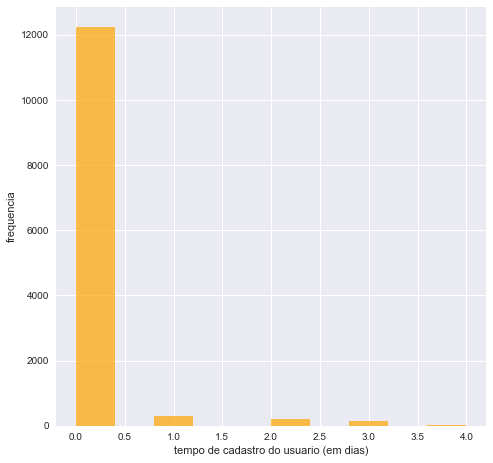

In [10]:
plt.hist(df['tempo_user'], alpha=0.7, color='orange')

plt.xlabel('tempo de cadastro do usuario (em dias)')  
plt.ylabel('frequencia');
plt.savefig('hist_tempo_user_download.png', dpi=100);

In [11]:
df_download.sort_values(by='tempo_user', ascending=False)

,Active,Client,DownloadClient,DownloadDate,DownloadFileID,DownloadID,Email,FirstAccessedPage,Fullname,Gender,Id,IsMobileRegister,LastLoginDate,RegisteredDate,UploadCount,tempo_user
48684,true,Website,Website,2015-12-07 13:31:04,17724368,47780444,neusa0304@gmail.com,https://www.passeidireto.com/arquivo/17340039/...,NeusaStelle,false,17703637,false,2015-12-07 13:29:48,2015-12-03 12:09:09,0,4.0
41946,true,Website,NaN,2015-12-03 18:31:25,2462027,47342178,luziamariadesantanadias@gmail.com,https://www.passeidireto.com/arquivo/2462027/p...,luziamaria de santana dias,false,17712040,false,2015-12-07 18:54:53,2015-12-03 18:28:28,0,4.0
44355,true,Website,Website,2015-12-07 18:49:01,17334823,47834729,deidi.opo@gmail.com,https://www.passeidireto.com/arquivo/2443563/p...,DeidianeDe Oliveira Nunes,false,17709280,false,2015-12-07 18:47:32,2015-12-03 16:17:16,0,4.0
44356,true,Website,NaN,2015-12-03 16:23:12,17042748,47321496,deidi.opo@gmail.com,https://www.passeidireto.com/arquivo/2443563/p...,DeidianeDe Oliveira Nunes,false,17709280,false,2015-12-07 18:47:32,2015-12-03 16:17:16,0,4.0
44357,true,Website,Website,2015-12-03 17:26:50,11018566,47332594,deidi.opo@gmail.com,https://www.passeidireto.com/arquivo/2443563/p...,DeidianeDe Oliveira Nunes,false,17709280,false,2015-12-07 18:47:32,2015-12-03 16:17:16,0,4.0
44358,true,Website,Website,2015-12-03 17:27:02,11018509,47332620,deidi.opo@gmail.com,https://www.passeidireto.com/arquivo/2443563/p...,DeidianeDe Oliveira Nunes,false,17709280,false,2015-12-07 18:47:32,2015-12-03 16:17:16,0,4.0
44359,true,Website,NaN,2015-12-03 16:24:01,6164253,47321639,deidi.opo@gmail.com,https://www.passeidireto.com/arquivo/2443563/p...,DeidianeDe Oliveira Nunes,false,17709280,false,2015-12-07 18:47:32,2015-12-03 16:17:16,0,4.0
47022,true,Website,NaN,2015-12-03 14:02:11,16865895,47296401,kfe.caf@gmail.com,https://www.passeidireto.com/arquivo/6348050/v...,Dalmo Pinheiro,true,17705622,false,2015-12-07 18:38:15,2015-12-03 13:44:01,0,4.0
47154,true,Website,Website,2015-12-03 13:42:12,2241792,47293433,abnersfernandes@gmail.com,https://www.passeidireto.com/arquivo/2241792/b...,AbnerFernandes,false,17705426,false,2015-12-07 15:32:54,2015-12-03 13:34:43,0,4.0
47155,true,Website,Website,2015-12-03 13:45:44,2241792,47293877,abnersfernandes@gmail.com,https://www.passeidireto.com/arquivo/2241792/b...,AbnerFernandes,false,17705426,false,2015-12-07 15:32:54,2015-12-03 13:34:43,0,4.0


In [12]:
df_download['tempo_user'].value_counts()

0.0    44081
1.0     2241
2.0     2216
3.0     1274
4.0      188
Name: tempo_user, dtype: int64

In [13]:
df_download['UploadCount'].value_counts()

0    50000
Name: UploadCount, dtype: int64

# Total de downloads por ID

In [14]:
ids_unicos = df_download['Id'].drop_duplicates().dropna()
len(ids_unicos)

12890

In [15]:
df_count_downloads = df_download[['Id', 'DownloadFileID']].drop_duplicates().dropna()
df_count_downloads.shape

(40128, 2)

In [16]:
df_count_downloads.shape
df_count_downloads.head()

,Id,DownloadFileID
0,17769990,1561467
1,17769961,1776861
2,17769942,3616897
3,17769936,4180002
4,17769935,3046473


In [17]:
df_count_downloads = df_count_downloads.groupby('Id')['DownloadFileID'].count().reset_index()

In [18]:
df_count_downloads.sort_values(by='DownloadFileID', ascending=False, inplace=True)
df_count_downloads.head()

,Id,DownloadFileID
2024,17711766,468
3626,17719675,329
11261,17758134,216
3323,17718051,155
5883,17731369,152


In [19]:
print('media', df_count_downloads['DownloadFileID'].mean())
print('mediana',df_count_downloads['DownloadFileID'].median())

('media', 3.11311093871218)
('mediana', 1.0)


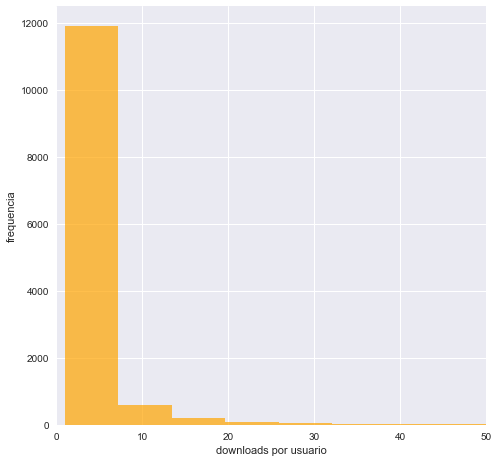

In [20]:
plt.hist(df_count_downloads['DownloadFileID'], alpha=0.7, color='orange', bins=75)

plt.xlabel('downloads por usuario')  
plt.ylabel('frequencia')
plt.xlim(0,50)
plt.savefig('hist_downloads_user.png', dpi=100);

# retirando as informações importantes para clusterização

In [21]:
df_cluster_downloads = pd.merge(df, df_count_downloads, on='Id')

In [22]:
df_cluster_downloads.head()

,Id,tempo_user,DownloadFileID
0,17709280,4.0,6
1,17703308,4.0,1
2,17704395,4.0,17
3,17703817,4.0,3
4,17709838,4.0,12


In [23]:
df_cluster_downloads.columns = ['Id', 'tempo_base_download', 'qnt_downloads']

In [24]:
df_cluster_downloads.head()

,Id,tempo_base_download,qnt_downloads
0,17709280,4.0,6
1,17703308,4.0,1
2,17704395,4.0,17
3,17703817,4.0,3
4,17709838,4.0,12


In [25]:
df_count_downloads.to_csv('df_cluster_downloads.csv', index=False)